# 2.2 Visualização de Dados
## BIBLIOTECAS

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

## LEITURA DO DATASET

In [2]:
#leitura do dataset de casos confirmados
confirmed_cases = pd.read_csv("outputs/base_covid_tratada.csv", encoding = "ISO-8859-1", sep=';',header=0)
confirmed_cases.head(2)

,_idade,_faixa etária,_sexo,_bairro,_classificacao,_conclusao,_dt_notificacao,_tipo_teste,_distrito,_bairro_mapa
0,25.0,20a - 29a,F,ADRIANOPOLIS,Confirmado,Recuperado,20/03/2020,RT-PCR,SUL,ADRIANÓPOLIS
1,41.0,40a - 49a,F,BETANIA,Confirmado,Recuperado,27/03/2020,RT-PCR,SUL,BETÂNIA


## Visualização dos Dados

### 3. Número de novos casos nos últimos 10 dias

d:\programas\python\python37\lib\site-packages\ipykernel_launcher.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator


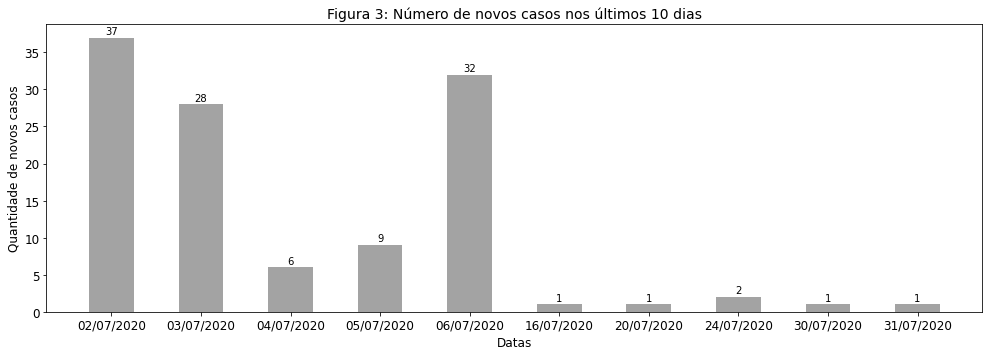

In [49]:
# configuracao da base de dados
data = confirmed_cases
data['_dt_notificacao'] = pd.to_datetime(data['_dt_notificacao'], format="%d/%m/%Y").dropna()

# captura da data mais recente
date_groups = data.groupby('_dt_notificacao')
group_counts = date_groups.count()[-10:]

new_cases = []
dates = []

for index in group_counts.index:
    dates.append(index.strftime("%d/%m/%Y"))
    new_cases.append(date_groups.get_group(index).shape[0])

# configuracao de construcao do grafico
width = 0.5
fig = plt.figure(figsize=(13,4))
ax = fig.add_axes([0,0,1,1])
rects = ax.bar(dates, new_cases, width, color=(0.4, 0.4, 0.4, 0.6))
plt.xlabel('Datas', fontsize=12)
plt.ylabel('Quantidade de novos casos', fontsize=12)
plt.title('Figura 3: Número de novos casos nos últimos 10 dias', fontsize=14)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(12)
ax.set_xticklabels(dates)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0,1.5),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects)
plt.show()

### 4: Número de casos recuperados nos últimos 10 dias

d:\programas\python\python37\lib\site-packages\ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator


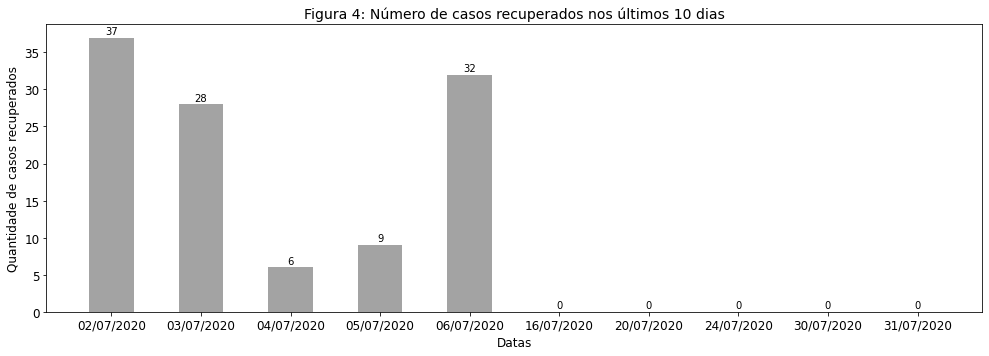

In [51]:
new_cases = []

for index in group_counts.index:
    group_data = date_groups.get_group(index)
    group_data = group_data[group_data['_conclusao'] == 'Recuperado']
    new_cases.append(group_data.shape[0])

# configuracao de construcao do grafico
width = 0.5
fig = plt.figure(figsize=(13,4))
ax = fig.add_axes([0,0,1,1])
rects = ax.bar(dates, new_cases, width, color=(0.4, 0.4, 0.4, 0.6))
plt.xlabel('Datas', fontsize=12)
plt.ylabel('Quantidade de casos recuperados', fontsize=12)
plt.title('Figura 4: Número de casos recuperados nos últimos 10 dias', fontsize=14)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(12)
ax.set_xticklabels(dates)

autolabel(rects)
plt.show()    

### 5: Número casos por faixa etária

In [ ]:
# configuracao da base de dados
data = confirmed_cases


# agrupamento por faixa etaria
groups = data.groupby(['_faixa etária'])
age_groups = groups.groups.keys()
cases = groups.size().array

# funcao de ajuste de ordenacao especifica
def sorting_adjustment(list_items):
    list_aux = list(list_items)
    aux = list_aux[2]
    del(list_aux[2])
    list_aux.insert(0, aux)
    return list_aux

age_groups = sorting_adjustment(age_groups)
cases = sorting_adjustment(cases)

# configuracao de construcao do grafico
width = 0.5
fig = plt.figure(figsize=(13,4))
ax = fig.add_axes([0,0,1,1])
rects = ax.bar(age_groups, cases, width, color=(0.4, 0.4, 0.4, 0.6))
plt.xlabel('Faixa Etária', fontsize=12)
plt.ylabel('Quantidade de casos', fontsize=12)
plt.title('Figura 5: Quantidade de casos por faixa etária', fontsize=14)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(12)
ax.set_xticklabels(age_groups)

autolabel(rects)
plt.show() 

### 6: Quantidade cumulativa de casos notificados ao longo do tempo

In [ ]:
# configuracao da base de dados
data = confirmed_cases

# convertendo string para objetos datetime para manipulacao e ordenacao
data['notified_cases'] = pd.to_datetime(data['_dt_notificacao'], format="%d/%m/%Y")
data = data.sort_values(by=['notified_cases'])

# agrupamento de casos por dia
groups = data.groupby(['notified_cases'])

dates_groups = groups.groups.keys()
notified_cases = groups.size().array

# Ajuste de datas faltantes
day = min(list(dates_groups))
days = []
values = []

one_day = dt.timedelta(days=1)
while (day<max(list(dates_groups))):
    if(not(day in list(dates_groups))):
        days.append(day)
        values.append(0)
    day = day + one_day

dates_groups, notified_cases = (list(t) for t in zip(*sorted(zip(list(dates_groups) + days, list(notified_cases) + values))))

# acumulacao
for i in range(1, len(notified_cases)):
    notified_cases[i]+=notified_cases[i-1]

x = groups.groups.keys()

# configuracao de construcao do grafico
fig = plt.figure(figsize=(13,4))
ax = fig.add_axes([0,0,1,1])
plt.bar(dates_groups, notified_cases, color=(0.4, 0.4, 0.4, 0.6))
plt.xlabel('Tempo', fontsize=12)
plt.ylabel('Quantidade de casos acumulados', fontsize=12)
plt.title('Figura 6: Quantidade cumulativa de casos notificados ao longo do tempo', fontsize=14)
plt.show()
